In [19]:
from luminis_mc import ResultsLoader
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [34]:
base_dir = "/Users/niaggar/Documents/Thesis/Progress/23Feb26/"
dir_name = "2026-02-20_16-09-09_sim_ring"
data = ResultsLoader(base_dir + dir_name)

meta_sensor = data.sensor_meta("planar_fluence")
print(meta_sensor)

{'N_t': np.int64(20), 'N_x': np.int64(500), 'N_y': np.int64(500), 'absorb_photons': np.True_, 'backward_normal': array([-0., -0., -1.]), 'dt': np.float64(0.5), 'dx': np.float64(0.1), 'dy': np.float64(0.1), 'estimator_enabled': np.True_, 'filter_phi_enabled': np.False_, 'filter_phi_max': np.float64(0.0), 'filter_phi_min': np.float64(0.0), 'filter_position_enabled': np.True_, 'filter_theta_enabled': np.False_, 'filter_theta_max': np.float64(0.0), 'filter_theta_min': np.float64(0.0), 'filter_x_max': np.float64(25.0), 'filter_x_min': np.float64(-25.0), 'filter_y_max': np.float64(25.0), 'filter_y_min': np.float64(-25.0), 'hits': np.int64(5606006), 'id': '0', 'len_t': np.float64(10.0), 'len_x': np.float64(50.0), 'len_y': np.float64(50.0), 'm_polarization': array([1., 0., 0.]), 'n_polarization': array([0., 1., 0.]), 'normal': array([0., 0., 1.]), 'origin': array([0., 0., 0.]), 'type': 'PlanarFluenceSensor'}


(20, 500, 500) (500, 500)


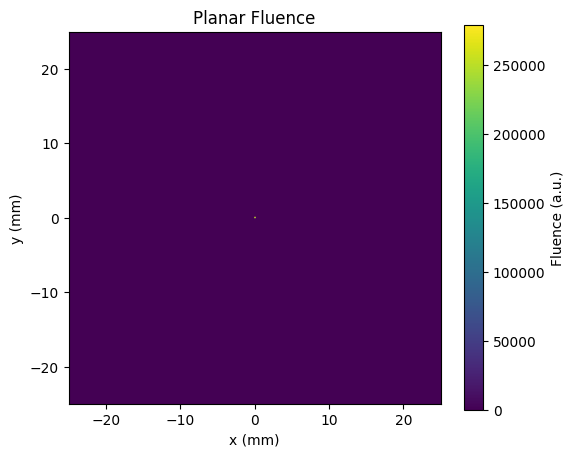

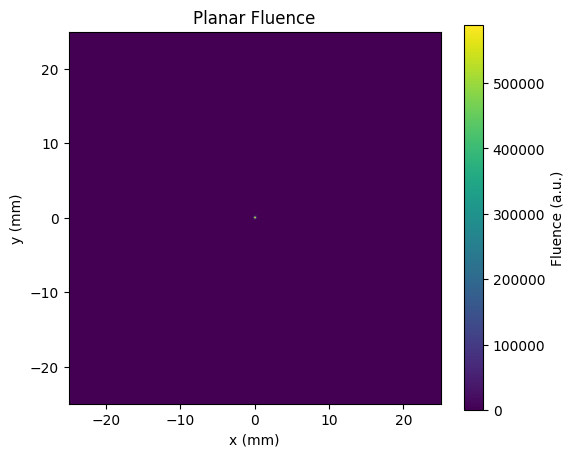

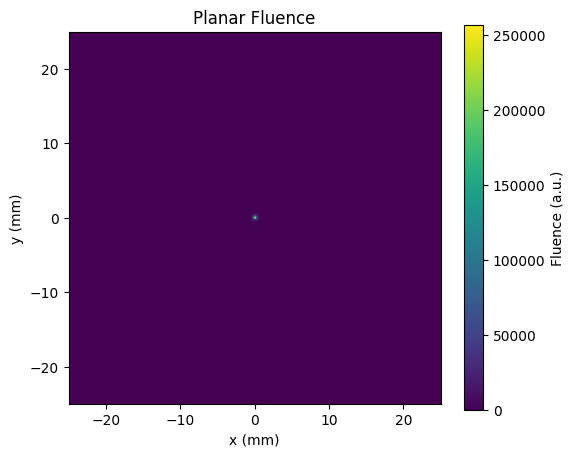

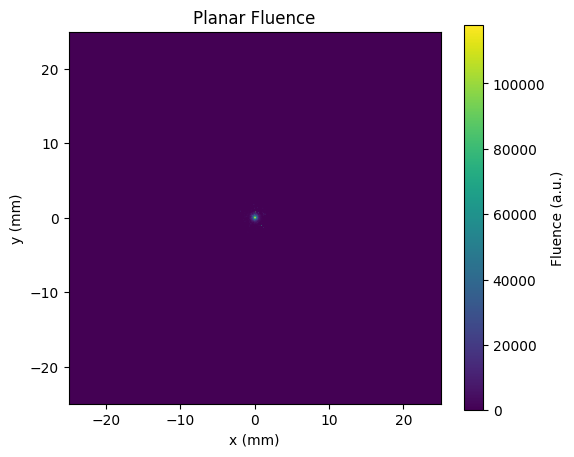

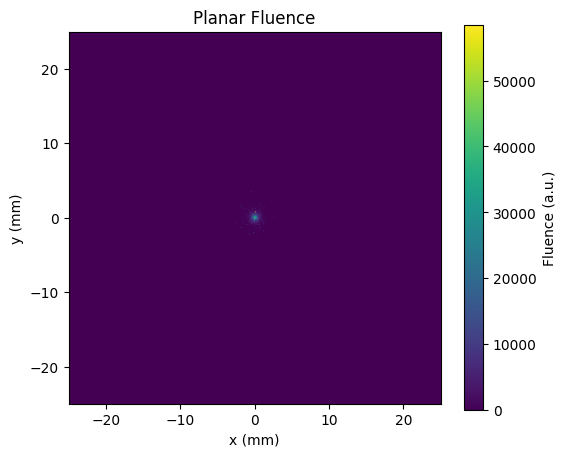

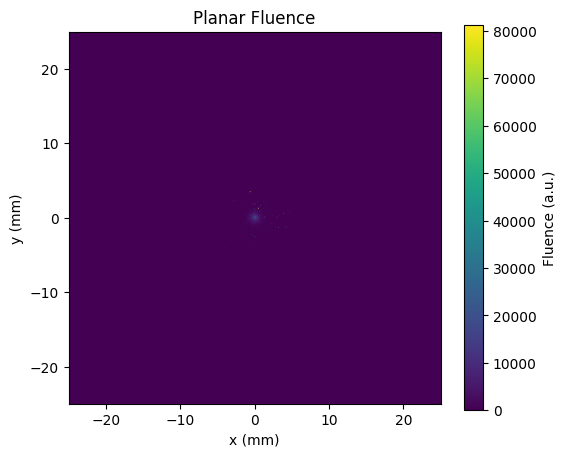

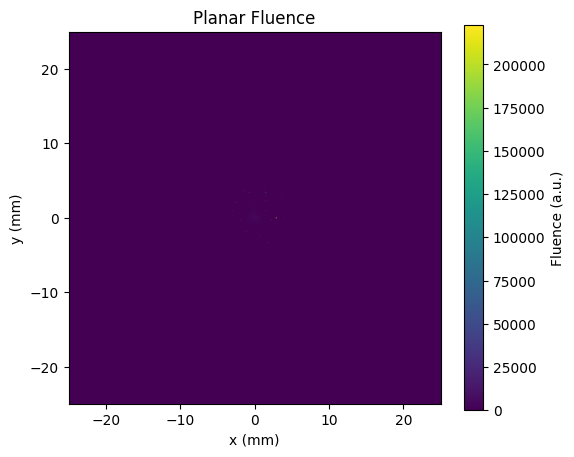

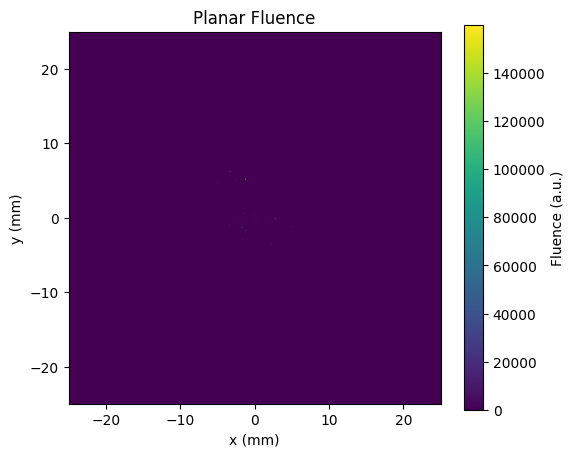

In [35]:
S0_t = data.sensor_data("planar_fluence", "S0_t")
S1_t = data.sensor_data("planar_fluence", "S1_t")
S2_t = data.sensor_data("planar_fluence", "S2_t")
S3_t = data.sensor_data("planar_fluence", "S3_t")

Ix_t = (S0_t + S1_t) / 2
Iy_t = (S0_t - S1_t) / 2

I_co_t = (S0_t + S3_t) / 2
I_cr_t = (S0_t - S3_t) / 2

print(Ix_t.shape, Ix_t[0].shape)

# plot the fluence at t=0 as a 2D image
def plot_fluence(fluence, meta):
    plt.figure(figsize=(6, 5))
    plt.imshow(fluence, extent=(-meta['len_x']/2, meta['len_x']/2, -meta['len_y']/2, meta['len_y']/2), origin='lower', aspect='equal')
    plt.colorbar(label='Fluence (a.u.)')
    plt.xlabel('x (mm)')
    plt.ylabel('y (mm)')
    plt.title('Planar Fluence')
    plt.show()

t_indexes = [0, 2, 5, 7, 10, 12, 15, 19]
for t in t_indexes:
    plot_fluence(I_co_t[t], meta_sensor)



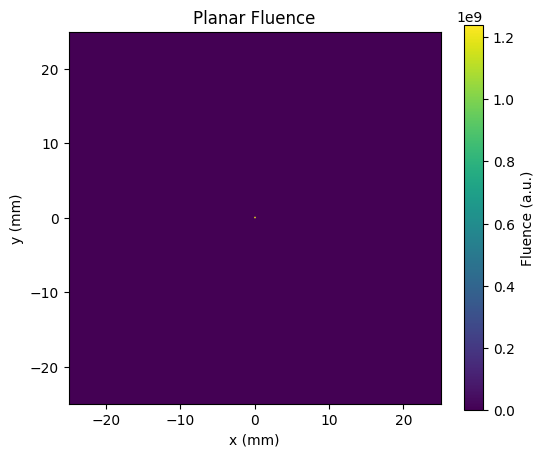

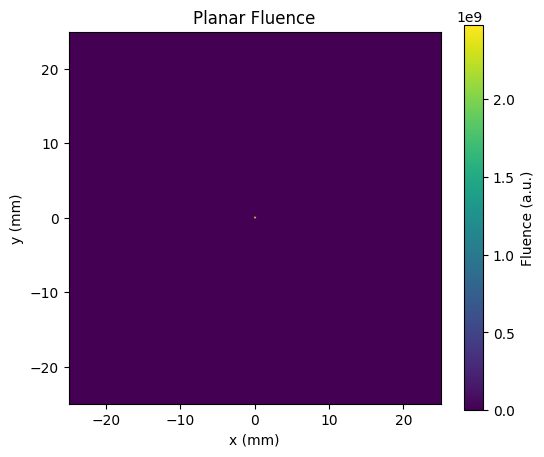

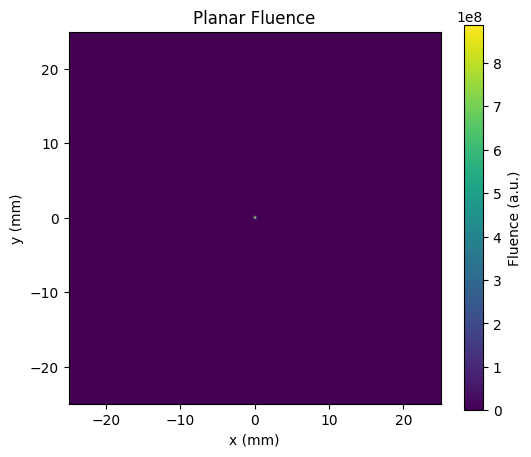

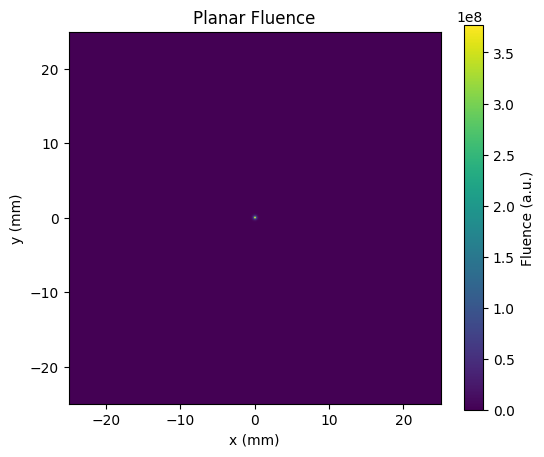

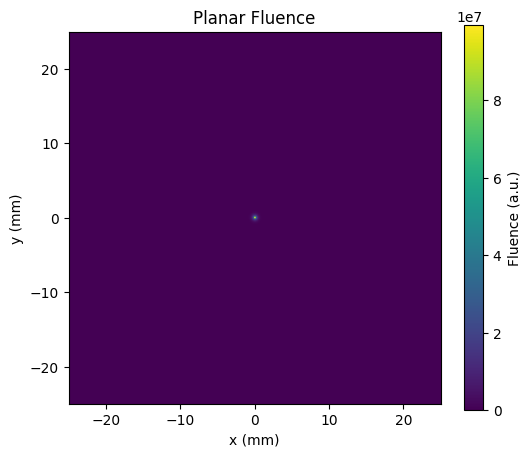

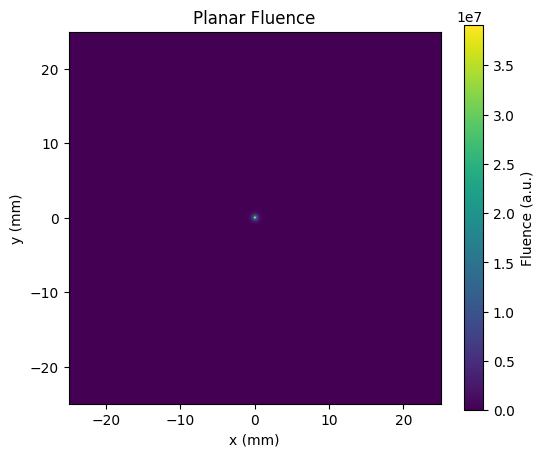

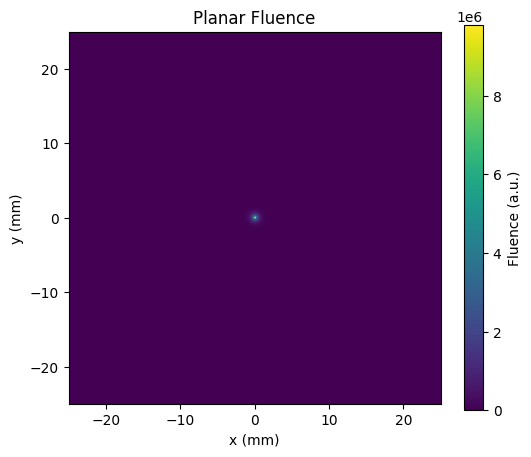

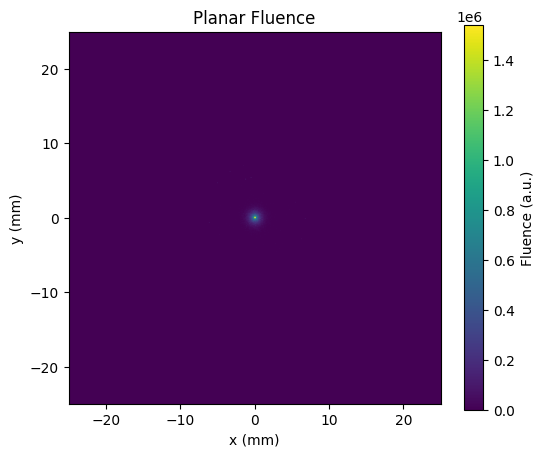

In [36]:
t_indexes = [0, 2, 5, 7, 10, 12, 15, 19]
for t in t_indexes:
    plot_fluence(I_cr_t[t], meta_sensor)

In [25]:
print(data.h5['sensors/statistics/data'].keys())

events_histogram = data.sensor_data('statistics', 'events_histogram')
depth_histogram = data.sensor_data('statistics', 'depth_histogram')
theta_histogram = data.sensor_data('statistics', 'theta_histogram')
phi_histogram = data.sensor_data('statistics', 'phi_histogram')

meta_hist = data.sensor_meta('statistics')


<KeysViewHDF5 ['depth_histogram', 'events_histogram', 'phi_histogram', 'theta_histogram']>


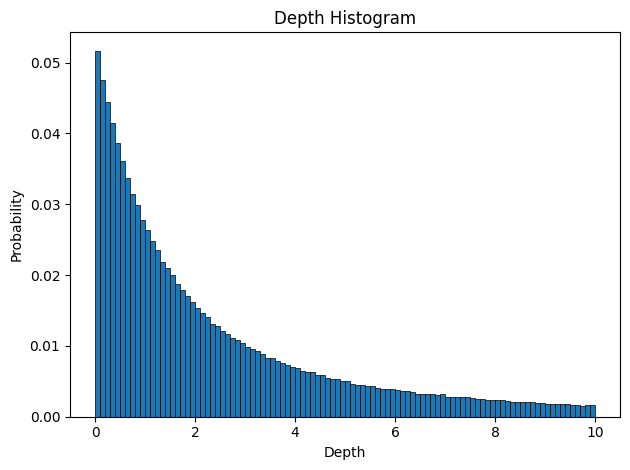

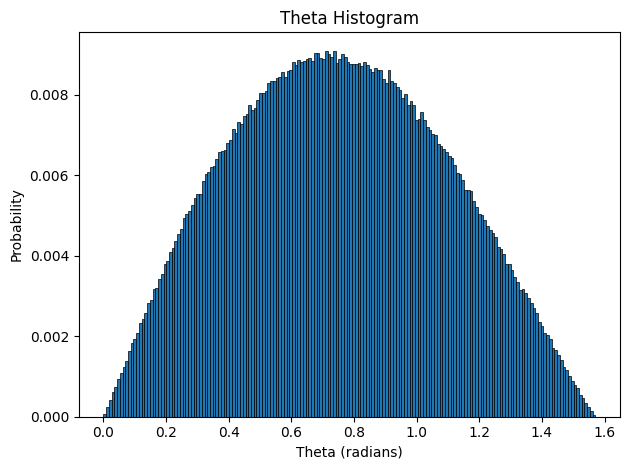

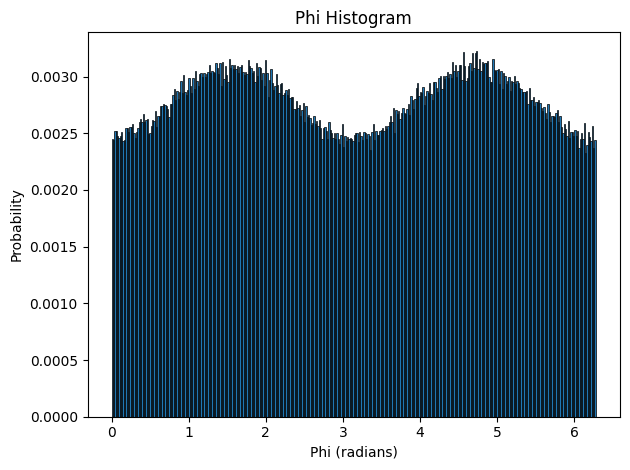

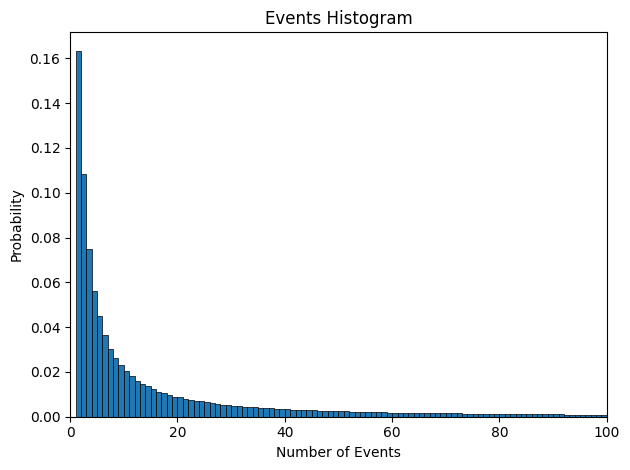

In [26]:
def plot_histogram(hist, edges, ax=None, title="", xlabel="", ylabel="Probability", x_max=None):
    if ax is None:
        ax = plt.gca()
    widths = np.diff(edges)
    total = np.sum(hist)
    if total > 0:
        prob = hist / total
    else:
        prob = hist
    ax.bar(edges[:-1], prob, width=widths, align='edge', edgecolor='black', linewidth=0.5)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if x_max is not None:
        ax.set_xlim(0, x_max)
    
    plt.tight_layout()
    plt.show()


ddepth_edges = np.linspace(0, meta_hist['max_depth'], meta_hist['n_bins_depth'] + 1)
plot_histogram(depth_histogram, ddepth_edges, title="Depth Histogram", xlabel="Depth")

theta_edges = np.linspace(0, meta_hist['max_theta'], meta_hist['n_bins_theta'] + 1)
plot_histogram(theta_histogram, theta_edges, title="Theta Histogram", xlabel="Theta (radians)")

phi_edges = np.linspace(0, meta_hist['max_phi'], meta_hist['n_bins_phi'] + 1)
plot_histogram(phi_histogram, phi_edges, title="Phi Histogram", xlabel="Phi (radians)")

events_edges = np.linspace(0, meta_hist['max_events'], meta_hist['max_events'] + 1)
plot_histogram(events_histogram, events_edges, title="Events Histogram", xlabel="Number of Events", x_max=100)

